## Code summary PCA Anomaly

Simple step by step notebook. Purposely not written in a function; sometimes important to understand what is going on.


Our situation is a little different than in the book:

- We do not have the ground truth
- Examples based on binary classification, 1 on 1 copy does not work
-

## Load data

Using MNST dataset, using this one as it is easy to visually validate the outlier.

In [1]:
#Load and display
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)



(1797, 64)


In [2]:
import pandas as pd
df = pd.DataFrame(digits.data)
df['target'] = digits.target
df.shape

(1797, 65)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


## Create a 'marker' anomaly

This will assert that the algorithm ran in all cases (i.e. even if no 'true' anomalyis identified)

In [4]:
import numpy as np
#create anomaly

subset= df.drop(['target'], axis=1)
df = df.append(subset.max(axis=0), ignore_index=True)
# new = np.full((64),.)

# df = df.append([new],ignore_index=True )

df.fillna(value=99, inplace=True)

df.tail()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  """


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9.0
1796,0.0,0.0,10.0,14.0,8.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,1.0,8.0,12.0,14.0,12.0,1.0,0.0,8.0
1797,0.0,8.0,16.0,16.0,16.0,16.0,16.0,15.0,2.0,16.0,...,13.0,1.0,9.0,16.0,16.0,16.0,16.0,16.0,16.0,99.0


## Define X, y

for this data set only

In [5]:
X = df.drop(['target'], axis=1)
y = df['target']

## Define X

Generically only X will be available, select only numeric columns

In [6]:
X = pd.DataFrame(X)
X = X.select_dtypes(include=[np.number])

In [7]:
X.tail()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0
1796,0.0,0.0,10.0,14.0,8.0,1.0,0.0,0.0,0.0,2.0,...,8.0,0.0,0.0,1.0,8.0,12.0,14.0,12.0,1.0,0.0
1797,0.0,8.0,16.0,16.0,16.0,16.0,16.0,15.0,2.0,16.0,...,16.0,13.0,1.0,9.0,16.0,16.0,16.0,16.0,16.0,16.0


In [8]:
# Generic solution for adding marker
# X.append(X.max(axis=0), ignore_index=True)

## Scale

In [9]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X = ss.fit_transform(X)

In [10]:
type(X)

numpy.ndarray

In [11]:
#for purposes of this notebook to correctly display anomalies, X need to be inverse scales and reshaped to be plottable
Xrs=ss.inverse_transform(X)

#reformat data to plottable 3-d array


Xrs = Xrs.reshape(Xrs.shape[0],int(Xrs.shape[1]**(.5)),int(Xrs.shape[1]**(.5)))


Xrs.shape

(1798, 8, 8)

## Determining 'optimal' number of components

Heuristically eyeballed at 5% information loss.

In [12]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [13]:
# Extract the principal components and put them into a dataframe

pc_dict = {'PC'+str(i+1) : pca.components_[i] for i in range(len(pca.components_))}
pd.DataFrame(pc_dict)

,PC1,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,...,PC59,PC6,PC60,PC61,PC62,PC63,PC64,PC7,PC8,PC9
0,1.219886e-18,1.339828e-18,-2.618116e-19,4.627226e-19,-2.504532e-20,2.231823e-18,-2.457677e-19,3.338738e-18,-7.826933e-19,2.374740e-18,...,8.219750e-19,7.364702e-19,-4.176637e-19,-2.369033e-18,-0.000000e+00,-0.000000e+00,1.000000e+00,-2.572443e-18,-6.470608e-19,-4.515726e-18
1,-1.749704e-01,-1.969555e-01,-5.597126e-02,8.464866e-02,-2.472317e-01,1.173356e-02,-2.013539e-01,-3.024699e-03,1.372806e-01,1.151143e-01,...,2.288564e-02,1.193088e-01,-2.648624e-02,-2.903795e-02,9.058676e-17,-1.108898e-17,-3.228389e-18,1.344560e-01,-2.321543e-01,5.663972e-03
2,-2.865658e-01,-1.082436e-01,9.783055e-02,-1.133396e-01,1.695560e-02,6.049169e-02,-2.525809e-02,5.088931e-02,1.252575e-02,-8.227465e-02,...,-1.031244e-01,5.824434e-02,1.386520e-01,6.861029e-01,7.752016e-17,-8.257733e-17,4.860260e-18,2.838528e-02,-1.258793e-01,-7.294920e-02
3,-2.212543e-01,9.271969e-02,1.929004e-01,-2.527378e-01,1.172787e-02,-5.032544e-02,-7.360304e-02,5.522137e-02,-3.914587e-02,-1.933091e-02,...,5.893164e-02,-6.004844e-02,1.532116e-02,-1.799881e-02,3.326419e-17,7.845989e-17,-5.308952e-18,-2.391295e-01,7.091286e-02,-3.660330e-03
4,2.379437e-02,9.091525e-02,-1.303138e-01,-7.985880e-02,-1.415443e-01,-2.301387e-01,-2.592225e-01,-1.975798e-01,-4.500979e-01,-1.169412e-02,...,-3.483952e-02,1.109750e-01,-1.300715e-02,5.624825e-02,-8.790761e-17,-5.467107e-17,2.194141e-18,2.477194e-02,1.620781e-01,1.606731e-01
5,7.443523e-03,6.740539e-02,-3.291604e-01,-8.519767e-02,-1.294817e-01,2.788574e-02,-3.309369e-02,-9.853808e-02,-1.786700e-01,-5.105589e-02,...,1.057101e-01,-5.116377e-02,7.342001e-02,-2.332956e-03,1.894190e-16,-1.258461e-17,1.286471e-17,1.456947e-01,3.435497e-02,1.220783e-01
6,5.157718e-02,9.986959e-02,-2.011801e-01,-5.149906e-02,-1.975729e-01,7.441259e-02,2.067912e-01,4.646043e-02,1.189819e-02,-1.417529e-01,...,-7.825850e-02,-2.003207e-01,-1.299604e-03,5.560447e-03,-2.486595e-16,6.586770e-17,5.575186e-18,4.966395e-02,-1.577066e-01,3.602613e-02
7,6.179717e-02,1.625959e-01,6.347612e-02,7.848981e-02,-9.035513e-02,-1.219531e-01,2.600459e-01,7.430306e-02,-1.310512e-02,-2.210906e-01,...,4.323588e-03,-1.745750e-01,-3.665850e-03,6.266026e-03,-1.943815e-16,7.615952e-17,-6.616896e-19,-8.034188e-02,-1.842955e-01,-1.595119e-02
8,-2.256568e-02,1.356347e-02,-2.309115e-02,8.649243e-02,1.212656e-02,-1.128101e-01,-1.291179e-01,3.151641e-01,-3.322721e-02,-2.442999e-01,...,-6.292115e-03,5.016135e-02,-1.097028e-02,-3.937341e-03,5.468631e-17,-7.221578e-17,-1.104086e-18,3.452583e-02,1.785345e-01,1.097233e-01
9,-2.432701e-01,-1.331373e-01,4.307063e-02,2.020231e-01,-9.229433e-02,-1.766802e-01,-9.450131e-02,-3.599783e-02,1.084992e-02,-1.892972e-01,...,4.727714e-02,3.614373e-02,1.892564e-02,6.470150e-02,1.955366e-16,4.761949e-17,3.024915e-18,1.214046e-01,2.073150e-02,5.561461e-02


## 40 Principle components

Means 5% info loss

In [14]:
exp_var = pca.explained_variance_ratio_
np.cumsum(exp_var[:40])

array([0.11908435, 0.21375202, 0.29789275, 0.3758397 , 0.43949977,
       0.48482325, 0.52378721, 0.55775586, 0.59080197, 0.62000219,
       0.64671615, 0.67055628, 0.69238693, 0.71384071, 0.73171709,
       0.74940765, 0.76573533, 0.78068588, 0.79361112, 0.80611933,
       0.81828358, 0.82935297, 0.83943263, 0.84946138, 0.85886054,
       0.86764968, 0.876116  , 0.88400976, 0.89173093, 0.89891859,
       0.9059699 , 0.91261149, 0.91900941, 0.9247299 , 0.93021169,
       0.93517764, 0.93974167, 0.94405909, 0.94821272, 0.95225079])

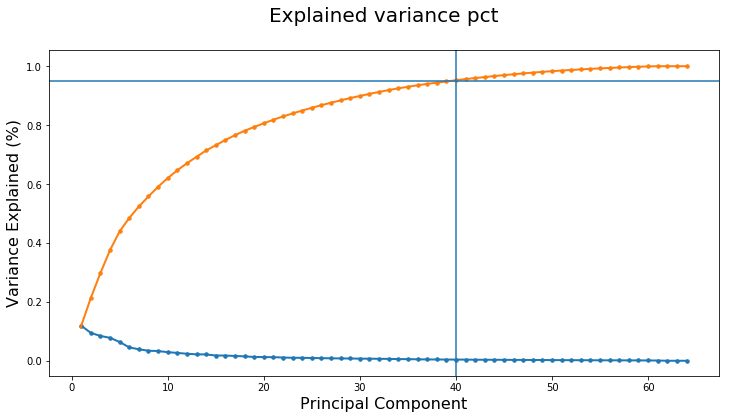

In [15]:
# plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,6))
x_values = list(range(1, pca.n_components_+1))
ax.plot(x_values, exp_var, lw=2)
ax.scatter(x_values, exp_var, s=12)
ax.plot(x_values, np.cumsum(exp_var), lw=2)
ax.scatter(x_values, np.cumsum(exp_var), s=12)
ax.axhline(.95)
ax.axvline(40)
ax.set_title('Explained variance pct\n', fontsize=20)
ax.set_xlabel('Principal Component', fontsize=16)
ax.set_ylabel('Variance Explained (%)', fontsize=16)
plt.show()

## Code adapted from the book

In [16]:
# Import libraries
'''Main'''
import numpy as np
import pandas as pd
import os, time
import pickle, gzip

'''Data Viz'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

'''Data Prep and Model Evaluation'''
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

## The essence of the approch

> ...dimensionality reduction algorithms reduce the dimensionality of data while attempting to minimize the reconstruction error. In other words, these algorithms try to capture the most salient information of the original features in such a way that they can reconstruct the original feature set from the reduced feature set as well as possible. However, these dimensionality reduction algorithms cannot capture all the information of the original features as they move to a lower dimensional space; therefore, there will be some error as these algorithms reconstruct the reduced feature set back to the original number of dimensions.  
> ... the algorithms will have the largest reconstruction error on those transactions that are hardest to model—in other words, those that occur the least often and are the most anomalous. Since fraud is rare and presumably different than normal transactions, the fraudulent transactions should exhibit the largest reconstruction error. 
So let’s define the anomaly score as the reconstruction error.   

> The reconstruction error for each transaction is the sum of the squared differences between the original feature matrix and the reconstructed matrix using the dimensionality reduction algorithm. We will scale the sum of the squared differences by the max-min range of the sum of the squared differences for the entire dataset, so that all the reconstruction errors are within a zero to one range.The transactions that have the largest sum of squared differences will have an error close to one, while those that have the smallest sum of squared differences will have an error close to zero.This should be familiar....the dimensionality reduction algorithm will effectively assign each transaction an anomaly score between zero and one. Zero is normal and one is anomalous (and most likely to be fraudulent).

In [17]:
def anomalyScores(originalDF, reducedDF):
    loss = np.sum((np.array(originalDF)-np.array(reducedDF))**2, axis=1)
    loss = pd.Series(data=loss)
    loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
    return loss

In [18]:
# Only works if y is defined, i.e. ground truth is known
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
               data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName)

In [19]:
type(y)

pandas.core.series.Series

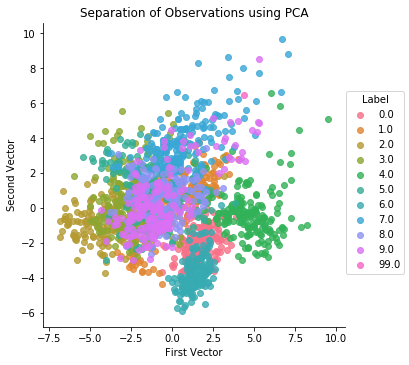

In [20]:
# 40 principal components
from sklearn.decomposition import PCA

n_components = 40
whiten = False
random_state = 2018

pca = PCA(n_components=n_components, whiten=whiten, \
          random_state=random_state)

X_train_PCA = pca.fit_transform(X)
X_train_PCA = pd.DataFrame(data=X_train_PCA)

X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse)

scatterPlot(X_train_PCA, y, "PCA")

In [21]:
X.shape

(1798, 64)

In [22]:
X_train_PCA_inverse.shape

(1798, 64)

In [23]:

loss = np.sum((np.array(X)-np.array(X_train_PCA_inverse))**2, axis=1)
loss = pd.Series(data=loss)
loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))


In [24]:
loss[loss > 0.9]

988    1.0
dtype: float64

In [25]:
Q = loss[loss > 0.9].index[0:].tolist()

In [26]:
Q

[988]

<Figure size 432x288 with 0 Axes>

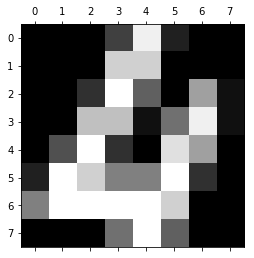

In [27]:
# import matplotlib.pyplot as plt 
plt.gray() 
for i in Q:
    plt.matshow(Xrs[i]) 
plt.show() 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


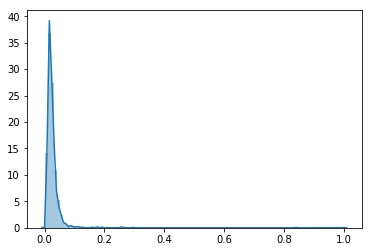

In [30]:
sns.distplot(loss, bins=100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)


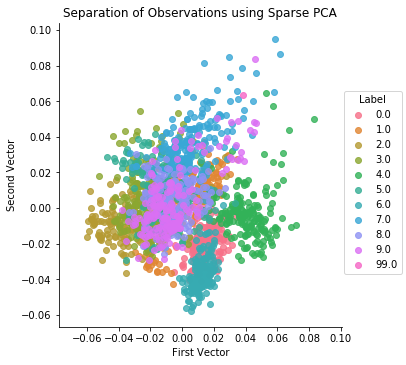

In [31]:
# Sparse PCA
from sklearn.decomposition import SparsePCA

n_components = 40
alpha = 0.0001
random_state = 2018
n_jobs = -1

sparsePCA = SparsePCA(n_components=n_components, \
                alpha=alpha, random_state=random_state, n_jobs=n_jobs)

sparsePCA.fit(X)
X_train_sparsePCA = sparsePCA.transform(X)
X_train_sparsePCA = pd.DataFrame(data=X_train_sparsePCA)

scatterPlot(X_train_sparsePCA, y, "Sparse PCA")

In [32]:
X_train_sparsePCA_inverse = np.array(X_train_sparsePCA). \
    dot(sparsePCA.components_) + np.array(X.mean(axis=0))
X_train_sparsePCA_inverse = \
    pd.DataFrame(data=X_train_sparsePCA_inverse)

anomalyScoresSparsePCA = anomalyScores(X, X_train_sparsePCA_inverse)

In [33]:
Q_ = anomalyScoresSparsePCA[anomalyScoresSparsePCA>.9].index[0:].tolist()

In [34]:
Q_

[988]

<Figure size 432x288 with 0 Axes>

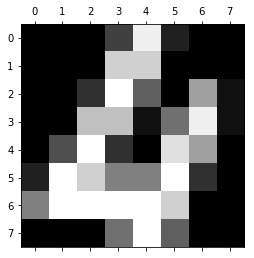

In [35]:
# import matplotlib.pyplot as plt 
plt.gray() 
for i in Q_:
    plt.matshow(digits.images[i]) 
plt.show() 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


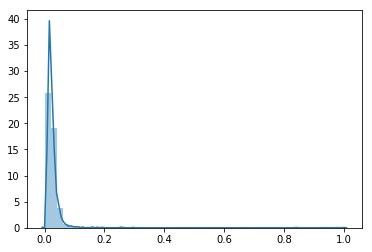

In [37]:
loss = np.sum((np.array(X)-np.array(X_train_sparsePCA_inverse))**2, axis=1)
loss = pd.Series(data=loss)
loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))

sns.distplot(loss)

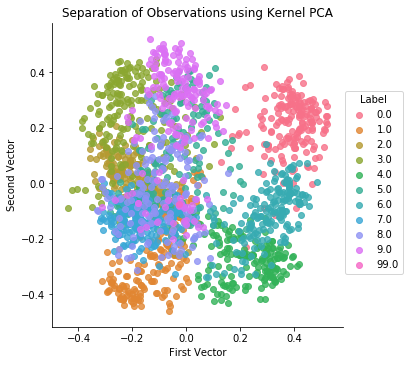

In [45]:
# Kernel PCA
from sklearn.decomposition import KernelPCA

n_components = 40
kernel = 'rbf'
gamma = None
fit_inverse_transform = True
random_state = 2018
n_jobs = 1

kernelPCA = KernelPCA(n_components=n_components, kernel=kernel, \
                gamma=gamma, fit_inverse_transform= \
                fit_inverse_transform, n_jobs=n_jobs, \
                random_state=random_state)

kernelPCA.fit(X)
X_train_kernelPCA = kernelPCA.transform(X)
X_train_kernelPCA = pd.DataFrame(data=X_train_kernelPCA)

X_train_kernelPCA_inverse = kernelPCA.inverse_transform(X_train_kernelPCA)
X_train_kernelPCA_inverse = pd.DataFrame(data=X_train_kernelPCA_inverse)

scatterPlot(X_train_kernelPCA, y, "Kernel PCA")

In [46]:
anomalyScoresKernelPCA = anomalyScores(X, X_train_kernelPCA_inverse)

<Figure size 432x288 with 0 Axes>

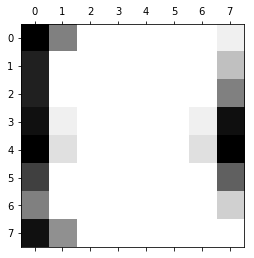

[1797]


In [47]:
Q__ = anomalyScoresKernelPCA[anomalyScoresKernelPCA>.9].index[0:].tolist()

# import matplotlib.pyplot as plt 
plt.gray() 
for i in Q__:
    plt.matshow(Xrs[i]) 
plt.show() 
print(Q__)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


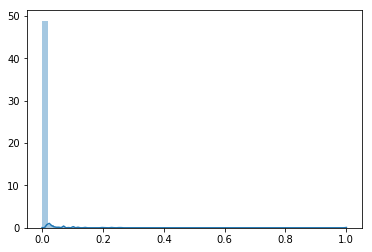

In [49]:
loss = np.sum((np.array(X)-np.array(X_train_kernelPCA_inverse))**2, axis=1)
loss = pd.Series(data=loss)
loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))

sns.distplot(loss)

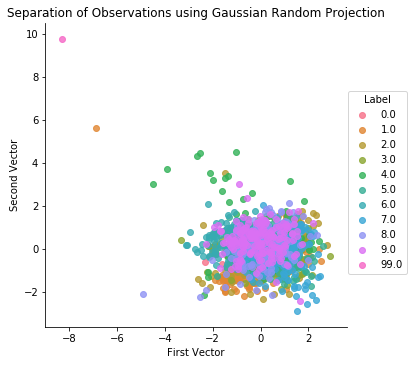

In [59]:
# Gaussian Random Projection
from sklearn.random_projection import GaussianRandomProjection

n_components = 40
eps = None
random_state = 2018

GRP = GaussianRandomProjection(n_components=n_components, \
                               eps=eps, random_state=random_state)

X_train_GRP = GRP.fit_transform(X)
X_train_GRP = pd.DataFrame(data=X_train_GRP)

scatterPlot(X_train_GRP, y, "Gaussian Random Projection")

In [60]:
X_train_GRP_inverse = np.array(X_train_GRP).dot(GRP.components_)
X_train_GRP_inverse = pd.DataFrame(data=X_train_GRP_inverse)

anomalyScoresGRP = anomalyScores(X, X_train_GRP_inverse)

[1797]


<Figure size 432x288 with 0 Axes>

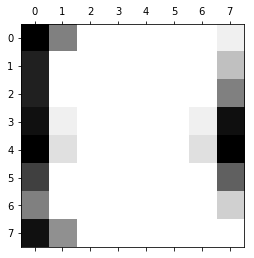

In [61]:
Q___ = anomalyScoresGRP[anomalyScoresGRP>.8].index[0:].tolist()
print(Q___)
# import matplotlib.pyplot as plt 
plt.gray() 
for i in Q___:
    plt.matshow(Xrs[i]) 
plt.show() 


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


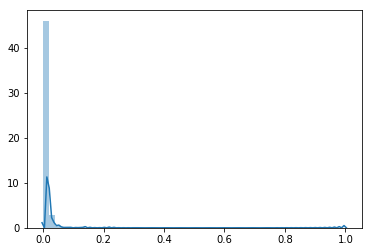

In [62]:
loss = np.sum((np.array(X)-np.array(X_train_GRP_inverse))**2, axis=1)
loss = pd.Series(data=loss)
loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))

sns.distplot(loss)

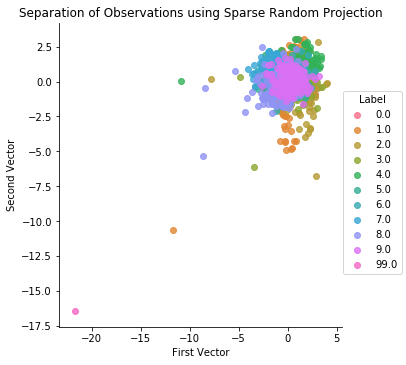

In [63]:
# Sparse Random Projection

from sklearn.random_projection import SparseRandomProjection

n_components = 40
density = 'auto'
eps = .01
dense_output = True
random_state = 2018

SRP = SparseRandomProjection(n_components=n_components, \
        density=density, eps=eps, dense_output=dense_output, \
                                random_state=random_state)

X_train_SRP = SRP.fit_transform(X)
X_train_SRP = pd.DataFrame(data=X_train_SRP)

scatterPlot(X_train_SRP, y, "Sparse Random Projection")

In [64]:
X_train_SRP_inverse = np.array(X_train_SRP).dot(SRP.components_.todense())
X_train_SRP_inverse = pd.DataFrame(data=X_train_SRP_inverse)

anomalyScoresSRP = anomalyScores(X, X_train_SRP_inverse)

[1797]


<Figure size 432x288 with 0 Axes>

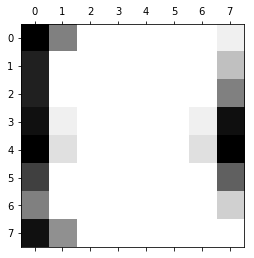

In [65]:
Q____ = anomalyScoresGRP[anomalyScoresGRP>.8].index[0:].tolist()
print(Q____)
# import matplotlib.pyplot as plt 
plt.gray() 
for i in Q____:
    plt.matshow(Xrs[i]) 
plt.show() 


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


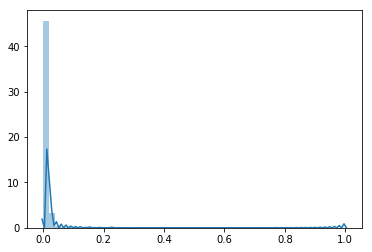

In [66]:
loss = np.sum((np.array(X)-np.array(X_train_SRP_inverse))**2, axis=1)
loss = pd.Series(data=loss)
loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))

sns.distplot(loss)

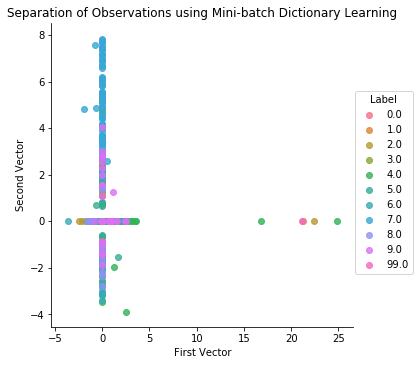

In [67]:
# Mini-batch dictionary learning
from sklearn.decomposition import MiniBatchDictionaryLearning

n_components = 40
alpha = 1
batch_size = 200
n_iter = 10
random_state = 2018

miniBatchDictLearning = MiniBatchDictionaryLearning( \
    n_components=n_components, alpha=alpha, batch_size=batch_size, \
    n_iter=n_iter, random_state=random_state)

miniBatchDictLearning.fit(X)
X_train_miniBatchDictLearning = \
    miniBatchDictLearning.fit_transform(X)
X_train_miniBatchDictLearning = \
    pd.DataFrame(data=X_train_miniBatchDictLearning)

scatterPlot(X_train_miniBatchDictLearning, y, \
            "Mini-batch Dictionary Learning")

In [68]:
X_train_miniBatchDictLearning_inverse = \
    np.array(X_train_miniBatchDictLearning). \
    dot(miniBatchDictLearning.components_)

X_train_miniBatchDictLearning_inverse = \
    pd.DataFrame(data=X_train_miniBatchDictLearning_inverse)

anomalyScoresMiniBatchDictLearning = anomalyScores(X, \
    X_train_miniBatchDictLearning_inverse)

[502]


<Figure size 432x288 with 0 Axes>

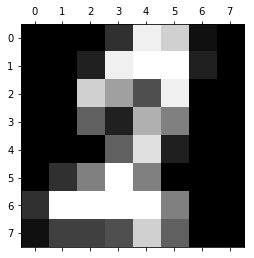

In [69]:
# anomalyScoresMiniBatchDictLearning = anomalyScoresMiniBatchDictLearning(X, X_train_fastICA_inverse)
Q_____ = anomalyScoresMiniBatchDictLearning[anomalyScoresMiniBatchDictLearning>.8].index[0:].tolist()
print(Q_____)
# import matplotlib.pyplot as plt 
plt.gray() 
for i in Q_____:
    plt.matshow(Xrs[i]) 
plt.show() 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


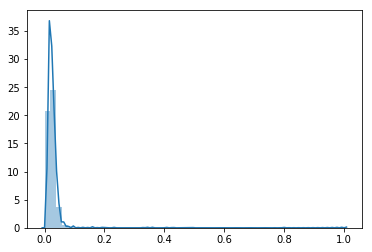

In [70]:
loss = np.sum((np.array(X)-np.array(X_train_miniBatchDictLearning_inverse))**2, axis=1)
loss = pd.Series(data=loss)
loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))

sns.distplot(loss)

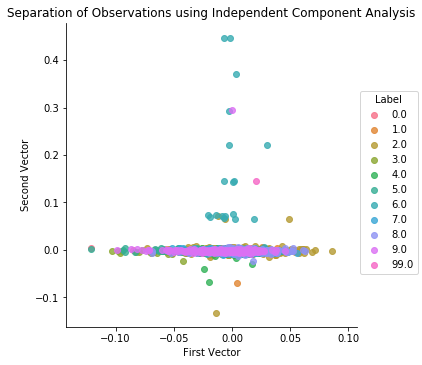

In [71]:
# Independent Component Analysis

from sklearn.decomposition import FastICA

n_components = 40
algorithm = 'parallel'
whiten = True
max_iter = 200
random_state = 2018

fastICA = FastICA(n_components=n_components, \
    algorithm=algorithm, whiten=whiten, max_iter=max_iter, \
    random_state=random_state)

X_train_fastICA = fastICA.fit_transform(X)
X_train_fastICA = pd.DataFrame(data=X_train_fastICA)

X_train_fastICA_inverse = fastICA.inverse_transform(X_train_fastICA)
X_train_fastICA_inverse = pd.DataFrame(data=X_train_fastICA_inverse)

scatterPlot(X_train_fastICA, y, "Independent Component Analysis")

[757, 988]


<Figure size 432x288 with 0 Axes>

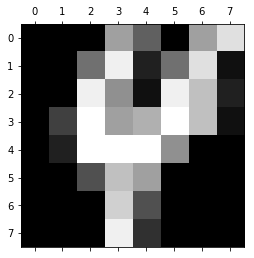

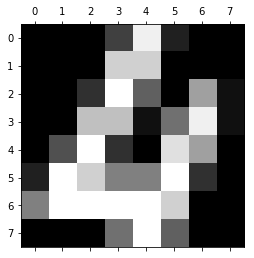

In [72]:
anomalyScoresFastICA = anomalyScores(X, X_train_fastICA_inverse)
Q______ = anomalyScoresFastICA[anomalyScoresFastICA>.8].index[0:].tolist()
print(Q______)
# import matplotlib.pyplot as plt 
plt.gray() 
for i in Q______:
    plt.matshow(Xrs[i]) 
plt.show() 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


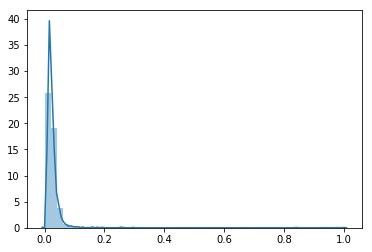

In [73]:
sns.distplot(anomalyScoresFastICA)

## Pulling it althogether

In [74]:
uniques =set(Q+Q_+Q__+Q___+Q____+Q_____+Q______)

In [75]:
uniques

{502, 757, 988, 1797}

# Supervised anomaly detection

In [115]:
# Isolation forest with 1% outliers
from sklearn.ensemble import IsolationForest
IsoFor =  IsolationForest(contamination=.01, random_state=42)
IsoFor = IsoFor.fit(X)
outlieriso = IsoFor.predict(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [147]:
X = pd.DataFrame(X)
X['outlierIso'] = outlieriso

In [148]:
X[X['outlierIso'] == -1].index

Int64Index([ 163,  317,  447,  673,  689,  732,  771,  988,  998, 1070, 1259,
            1274, 1495, 1572, 1576, 1589, 1635, 1797],
           dtype='int64')

[163, 317, 447, 673, 689, 732, 771, 988, 998, 1070, 1259, 1274, 1495, 1572, 1576, 1589, 1635, 1797]


<Figure size 432x288 with 0 Axes>

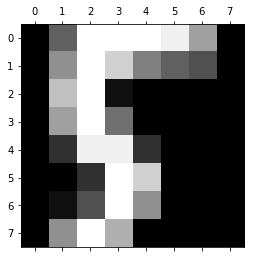

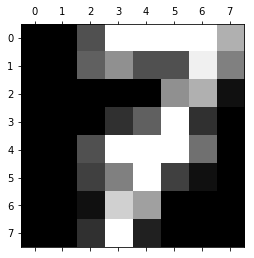

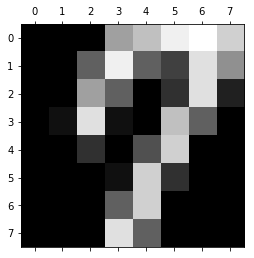

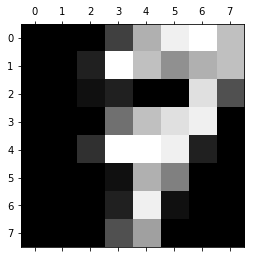

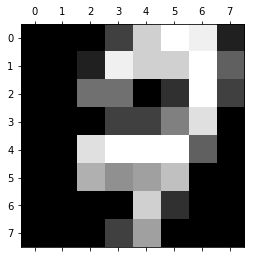

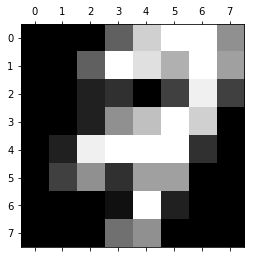

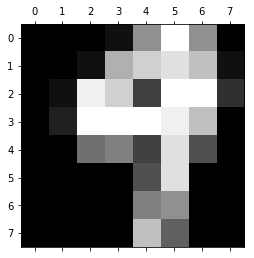

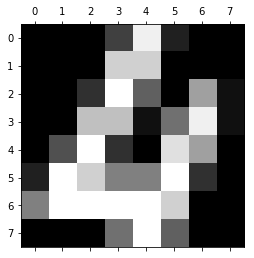

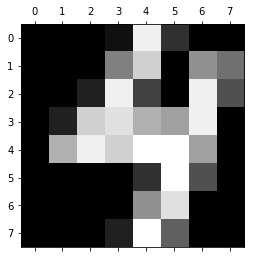

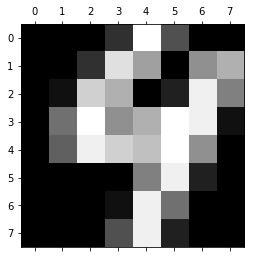

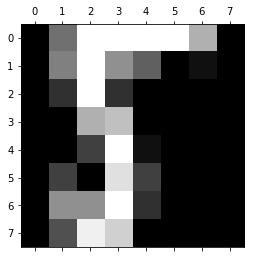

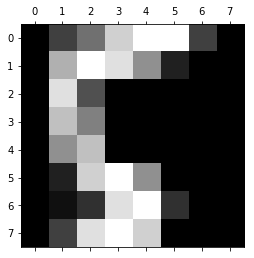

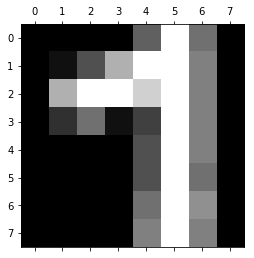

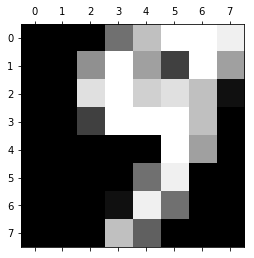

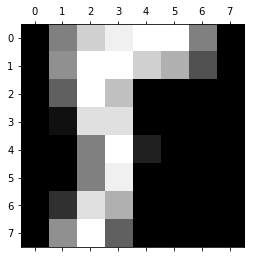

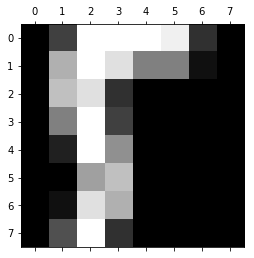

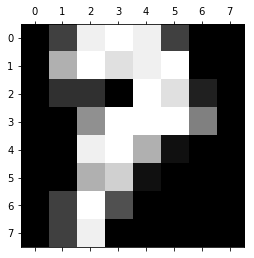

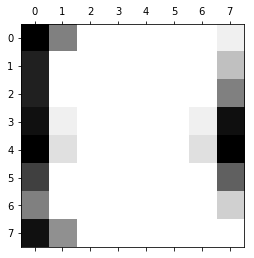

In [149]:
Q_______ = X[X['outlierIso'] == -1].index[0:].tolist()
print(Q_______)
# import matplotlib.pyplot as plt 
plt.gray() 
for i in Q_______:
    plt.matshow(Xrs[i]) 
plt.show() 

In [150]:
# to visualize
from sklearn import manifold
tsne = manifold.TSNE(n_components=2, init='random',
                         random_state=0, perplexity=5)
Y = tsne.fit_transform(X)

In [151]:
X['a'], X['b'] = zip(*Y)

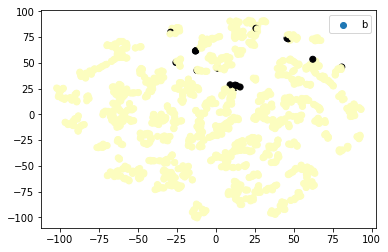

In [153]:
'''Data Viz'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

plt.magma()
plt.scatter(X['a'], X['b'], c=X['outlierIso'], cmap= 'magma')
plt.legend()

Not very distintive

## One class SVM

The sklearn.svm.OneClassSVM is known to be sensitive to outliers and thus does not perform very well for outlier detection. This estimator is best suited for novelty detection when the training set is not contaminated by outliers. That said, outlier detection in high-dimension, or without any assumptions on the distribution of the inlying data is very challenging, and a One-class SVM might give useful results in these situations depending on the value of its hyperparameters.

In [122]:
from sklearn import svm
clf = svm.OneClassSVM(nu=0.01, kernel="rbf", gamma=0.9)
clf.fit(X)
outlier_svm = clf.predict(X)


X['outlierSVM'] = outlier_svm

X[X['outlierSVM'] == -1].shape

(1316, 68)

This requires some parameter grid searching, oob not veryhopeful

## Elliptic Enveloppe

In [123]:
from sklearn.covariance import EllipticEnvelope

ee = EllipticEnvelope(random_state=0,contamination=.01)
ee.fit(X)
outlier_ee = ee.predict(X)
X['outlierEE'] = outlier_ee

X[X['outlierEE'] == -1].shape
X[X['outlierEE'] == -1]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:644: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "


,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,outlierIso,a,b,outlierSVM,outlierEE
558,0.0,-0.333223,-0.044293,0.508956,-2.531517,-1.021021,-0.410083,-0.126024,-0.063408,-0.623300,...,0.893798,0.849225,1.564184,3.394988,5.079352,1,36.647869,8.431288,-1,-1
563,0.0,-0.333223,-0.674679,0.979808,-1.598273,-1.021021,-0.410083,-0.126024,-0.063408,-0.623300,...,-0.478185,0.240977,1.564184,1.932089,1.385972,1,34.836479,9.481558,1,-1
586,0.0,-0.333223,-0.464550,0.744382,-1.598273,-1.021021,-0.410083,-0.126024,-0.063408,-0.623300,...,0.207807,0.849225,1.564184,3.151171,5.606978,1,36.713387,8.830603,-1,-1
596,0.0,-0.333223,-0.044293,0.273529,-2.298206,-1.021021,-0.410083,-0.126024,-0.063408,-0.623300,...,-0.020857,0.849225,1.564184,2.175906,0.858346,1,34.741779,9.538522,1,-1
609,0.0,-0.333223,-0.254421,0.744382,-1.831584,-1.021021,-0.410083,-0.126024,-0.063408,-0.623300,...,0.207807,0.849225,1.564184,3.151171,4.024101,1,36.493618,9.729937,1,-1
673,0.0,-0.333223,-1.094936,-1.845308,-0.198405,1.625235,4.377767,10.838104,-0.063408,-0.623300,...,-1.621504,-0.367272,-1.147056,-0.506075,-0.196906,-1,45.844341,-60.633148,1,-1
689,0.0,-0.333223,-1.094936,-1.845308,0.268217,1.801652,4.078526,1.701330,-0.063408,-0.623300,...,-1.850167,-0.367272,-1.147056,-0.506075,-0.196906,-1,39.888752,-53.354248,-1,-1
732,0.0,-0.333223,-1.094936,-1.374455,0.268217,1.801652,4.377767,8.097072,-0.063408,-0.623300,...,-1.164176,-0.570022,-1.147056,-0.506075,-0.196906,-1,45.611412,-60.611401,1,-1
998,0.0,-0.333223,-1.094936,-2.551587,0.734839,-0.491770,-0.410083,-0.126024,-0.063408,-0.623300,...,-2.307495,0.849225,-0.130341,-0.506075,-0.196906,-1,44.569027,-46.212723,1,-1
1012,0.0,-0.333223,-1.094936,-0.668176,0.268217,-1.021021,-0.410083,-0.126024,-0.063408,-0.623300,...,-0.706848,0.646476,-0.808151,-0.506075,-0.196906,1,45.300919,-44.726830,-1,-1


## Local Outlier Factor (LOF)

In [124]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
# lof = lof.fit_predict(X)

outlier_lof = lof.fit_predict(X)
X['outlierlof'] = outlier_lof

X[X['outlierlof'] == -1].shape
X[X['outlierlof'] == -1]

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,outlierIso,a,b,outlierSVM,outlierEE,outlierlof
87,0.0,-0.333223,-1.094936,-0.668176,0.968151,-0.315353,-0.410083,-0.126024,-0.063408,-0.311910,...,0.240977,-1.147056,-0.506075,-0.196906,1,-59.800236,-24.502378,-1,1,-1
327,0.0,-0.333223,-0.674679,-0.432750,0.968151,-0.315353,-0.410083,-0.126024,9.437195,2.490602,...,0.646476,-0.808151,-0.506075,-0.196906,1,-24.926392,-10.182346,-1,1,-1
502,0.0,-0.333223,-1.094936,-2.080734,0.734839,1.272400,-0.110842,-0.126024,-0.063408,-0.623300,...,0.240977,-0.130341,-0.506075,-0.196906,1,5.914713,66.591400,-1,1,-1
566,0.0,-0.333223,-0.464550,-0.197323,0.268217,-0.844604,-0.410083,-0.126024,-0.063408,1.245041,...,0.240977,0.886374,3.151171,2.441223,1,-23.171242,-5.363842,1,1,-1
757,0.0,-0.333223,-1.094936,-0.432750,-1.364961,-1.021021,2.582323,12.665458,-0.063408,-0.623300,...,-1.786519,-1.147056,-0.506075,-0.196906,1,46.510899,-52.694656,-1,1,-1
800,0.0,-0.333223,-1.094936,0.273529,-0.665028,-1.021021,-0.410083,-0.126024,-0.063408,-0.623300,...,-1.583770,-1.147056,-0.506075,-0.196906,1,-0.273944,70.126625,-1,1,-1
873,0.0,-0.333223,-1.094936,-1.374455,0.501528,-1.021021,-0.410083,-0.126024,-0.063408,-0.623300,...,0.849225,-0.469246,-0.506075,-0.196906,1,0.846521,69.130013,-1,1,-1
919,0.0,-0.333223,-1.094936,-2.316161,0.501528,-0.138936,-0.410083,-0.126024,-0.063408,-0.623300,...,0.849225,0.039112,-0.506075,-0.196906,1,0.328901,69.602531,-1,1,-1
988,0.0,-0.333223,-1.094936,-1.845308,0.734839,-0.668187,-0.410083,-0.126024,-0.063408,-0.623300,...,0.849225,-0.130341,-0.506075,-0.196906,-1,2.301556,68.039825,-1,1,-1
1070,0.0,-0.333223,-1.094936,-2.080734,0.968151,-0.138936,-0.410083,-0.126024,-0.063408,-0.623300,...,0.646476,-0.808151,-0.506075,-0.196906,-1,46.241135,-51.626427,1,-1,-1


In [125]:
lof

LocalOutlierFactor(algorithm='auto', contamination=0.01, leaf_size=30,
                   metric='minkowski', metric_params=None, n_jobs=None,
                   n_neighbors=20, novelty=False, p=2)

## Pulling supvised together

Appearing in 3/3 or 2/3

In [126]:
X[(X['outlierlof'] == -1)&(X['outlierEE'] == -1)&(X['outlierIso']==-1) | \
  (X['outlierlof'] == -1)&(X['outlierEE'] == -1) | \
  (X['outlierEE'] == -1)&(X['outlierIso'] == -1)]

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,outlierIso,a,b,outlierSVM,outlierEE,outlierlof
673,0.0,-0.333223,-1.094936,-1.845308,-0.198405,1.625235,4.377767,10.838104,-0.063408,-0.623300,...,-0.367272,-1.147056,-0.506075,-0.196906,-1,45.844341,-60.633148,1,-1,1
689,0.0,-0.333223,-1.094936,-1.845308,0.268217,1.801652,4.078526,1.701330,-0.063408,-0.623300,...,-0.367272,-1.147056,-0.506075,-0.196906,-1,39.888752,-53.354248,-1,-1,1
732,0.0,-0.333223,-1.094936,-1.374455,0.268217,1.801652,4.377767,8.097072,-0.063408,-0.623300,...,-0.570022,-1.147056,-0.506075,-0.196906,-1,45.611412,-60.611401,1,-1,1
998,0.0,-0.333223,-1.094936,-2.551587,0.734839,-0.491770,-0.410083,-0.126024,-0.063408,-0.623300,...,0.849225,-0.130341,-0.506075,-0.196906,-1,44.569027,-46.212723,1,-1,1
1070,0.0,-0.333223,-1.094936,-2.080734,0.968151,-0.138936,-0.410083,-0.126024,-0.063408,-0.623300,...,0.646476,-0.808151,-0.506075,-0.196906,-1,46.241135,-51.626427,1,-1,-1
1797,0.0,8.318554,2.267121,0.979808,0.968151,1.801652,4.377767,13.579136,18.937797,4.358943,...,0.849225,1.564184,3.394988,8.245107,-1,2.940757,67.459480,1,-1,-1


In [127]:
supervisedOutlier = X[(X['outlierlof'] == -1)&(X['outlierEE'] == -1)&(X['outlierIso']==-1) | \
  (X['outlierlof'] == -1)&(X['outlierEE'] == -1) | \
  (X['outlierEE'] == -1)&(X['outlierIso'] == -1)].index.tolist()

In [129]:
print(supervisedOutlier)
print(uniques)

[673, 689, 732, 998, 1070, 1797]
{988, 1797, 502, 87}


## Autoencoder

In [160]:
'''Main'''
import numpy as np
import pandas as pd
import os, time, re
import pickle, gzip

'''Data Viz'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

'''Data Prep and Model Evaluation'''
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

'''Algos'''
#import lightgbm as lgb

'''TensorFlow and Keras'''
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Dropout
from keras.layers import BatchNormalization, Input, Lambda
from keras import regularizers
from keras.losses import mse, binary_crossentropy

In [161]:
# Call neural network API
model = Sequential()

# Apply linear activation function to input layer
# Generate hidden layer with 29 nodes, the same as the input layer
model.add(Dense(units=64, activation='linear',input_dim=64))

# Apply linear activation function to hidden layer
# Generate output layer with 29 nodes
model.add(Dense(units=64, activation='linear'))

In [162]:
# Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [163]:
# Train the model
num_epochs = 10
batch_size = 64

history = model.fit(x=X, y=X,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X, X),
                    verbose=1)

Train on 1798 samples, validate on 1798 samples
Epoch 1/10
1798/1798 [==============================] - 0s 220us/step - loss: 53.7843 - acc: 0.0434 - val_loss: 26.5665 - val_acc: 0.0706
Epoch 2/10
1798/1798 [==============================] - 0s 47us/step - loss: 21.3714 - acc: 0.0729 - val_loss: 16.9556 - val_acc: 0.0823
Epoch 3/10
1798/1798 [==============================] - 0s 60us/step - loss: 14.5703 - acc: 0.0851 - val_loss: 12.2744 - val_acc: 0.0929
Epoch 4/10
1798/1798 [==============================] - 0s 77us/step - loss: 10.8633 - acc: 0.1018 - val_loss: 9.4298 - val_acc: 0.1057
Epoch 5/10
1798/1798 [==============================] - 0s 51us/step - loss: 8.5492 - acc: 0.1096 - val_loss: 7.6052 - val_acc: 0.1123
Epoch 6/10
1798/1798 [==============================] - 0s 49us/step - loss: 7.0047 - acc: 0.1185 - val_loss: 6.3539 - val_acc: 0.1274
Epoch 7/10
1798/1798 [==============================] - 0s 63us/step - loss: 5.9160 - acc: 0.1296 - val_loss: 5.4064 - val_acc: 0.1368

In [164]:
# Evaluate 
predictions = model.predict(X, verbose=1)
anomalyScoresAE = anomalyScores(X, predictions)
model.reset_states()

Q_AE = anomalyScoresAE[anomalyScoresAE>.8].index[0:].tolist()

1798/1798 [==============================] - 0s 48us/step


In [165]:
Q_AE

[1797]

In [76]:
import tensorflow as tf

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [77]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [78]:
X_train = X
n_components = 40

In [79]:
reset_graph()

n_inputs = X_train.shape[1]
n_hidden = n_components
n_outputs = n_inputs

learning_rate = 0.01

with tf.name_scope("variables") as scope:
    X = tf.placeholder(tf.float32, shape=[None, n_inputs])

with tf.name_scope("layers") as scope:
    hidden = tf.layers.dense(X, n_hidden)
    outputs = tf.layers.dense(hidden, n_outputs)

with tf.name_scope("loss") as scope:
    loss = tf.losses.mean_squared_error(X, outputs)

with tf.name_scope("optimization") as scope:
    optimizer = tf.train.AdamOptimizer(learning_rate)
    training_operation = optimizer.minimize(loss)

init = tf.global_variables_initializer()

epochs = 10000
encodings = hidden
loss_history = []
graph = tf.get_default_graph()


with tf.Session() as sess:
    init.run()
    for epoch in range(epochs):
        training_operation.run(feed_dict={X: X_train})
        loss_history.append(sess.run(loss, feed_dict={X: X_train}))
        if epoch % 1000 == 0:
            print('Epoch:', epoch)

    outputs_final, encodings_final, loss_final = sess.run(
        [outputs, encodings, loss], feed_dict={X: X_train})
    trainable = sess.run(graph.get_collection('trainable_variables'))

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch: 0
Epoch: 1000
Epoch: 2000
Epoch: 3000
Epoch: 4000
Epoch: 5000
Epoch: 6000
Epoch: 7000
Epoch: 8000
Epoch: 9000


In [15]:
outputs_final.shape

(1798, 64)

In [17]:
X_train.shape

(1798, 64)

In [18]:
encodings_final.shape

(1798, 34)

In [19]:
loss_final

0.5155671

In [23]:
anomalyScoresTF = anomalyScores(X_train, outputs_final)

In [25]:
outputs_final=pd.DataFrame(outputs_final)

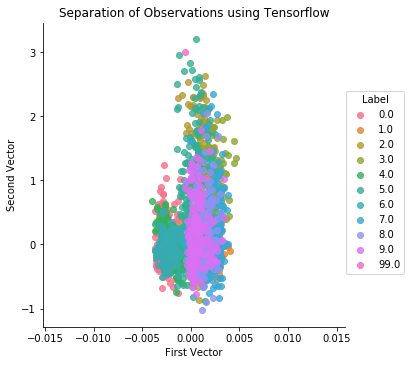

In [29]:
import seaborn as sns
scatterPlot(outputs_final, y, "Tensorflow")

<Figure size 432x288 with 0 Axes>

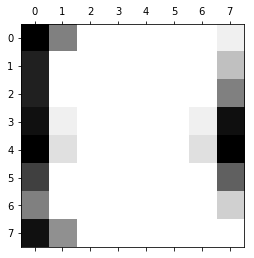

[1797]


In [42]:
Qtf = anomalyScoresTF[anomalyScoresTF>.9].index[0:].tolist()

# import matplotlib.pyplot as plt 
plt.gray() 
for i in Qtf:
    plt.matshow(Xrs[i]) 
plt.show() 
print(Qtf)

### 2layes

In [58]:
reset_graph()

n_inputs = X_train.shape[1]
n_hidden_1 = 40
n_hidden_2 = 40
n_outputs = n_inputs

learning_rate = 0.01

with tf.name_scope("variables") as scope:
    X = tf.placeholder(tf.float32, shape=[None, n_inputs])

with tf.name_scope("layers") as scope:
    hidden_1 = tf.layers.dense(X, n_hidden_1, activation=tf.nn.sigmoid)
    hidden_2 = tf.layers.dense(hidden_1, n_hidden_2, activation=tf.nn.sigmoid)
    outputs = tf.layers.dense(hidden_2, n_outputs, activation=None)

with tf.name_scope("loss") as scope:
    loss = tf.losses.mean_squared_error(X, outputs)

with tf.name_scope("optimization") as scope:
    optimizer = tf.train.AdamOptimizer(learning_rate)
    training_operation = optimizer.minimize(loss)

init = tf.global_variables_initializer()

epochs = 10000
loss_history = []
graph = tf.get_default_graph()


with tf.Session() as sess:
    init.run()
    for epoch in range(epochs):
        training_operation.run(feed_dict={X: X_train})
        loss_history.append(sess.run(loss, feed_dict={X: X_train}))
        if epoch % 1000 == 0:
            print('Epoch:', epoch)

    outputs_final, encodings_final, loss_final = sess.run(
        [outputs, hidden_1, loss], feed_dict={X: X_train})
    trainable = sess.run(graph.get_collection('trainable_variables'))

Epoch: 0
Epoch: 1000
Epoch: 2000
Epoch: 3000
Epoch: 4000
Epoch: 5000
Epoch: 6000
Epoch: 7000
Epoch: 8000
Epoch: 9000


In [59]:
loss_final

4.7580028

In [60]:
anomalyScoresTF55 = anomalyScores(X_train, outputs_final)

In [61]:
outputs_final=pd.DataFrame(outputs_final)

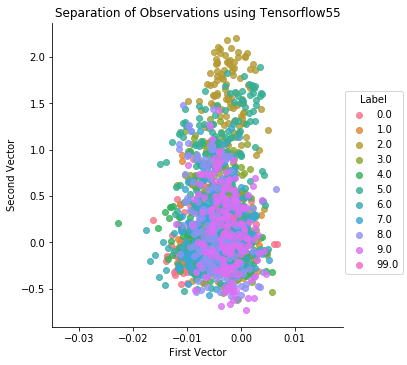

In [62]:
import seaborn as sns
scatterPlot(outputs_final, y, "Tensorflow55")

<Figure size 432x288 with 0 Axes>

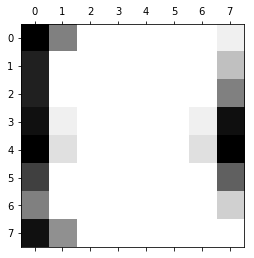

[1797]


In [64]:
Qtf55 = anomalyScoresTF55[anomalyScoresTF55>.8].index[0:].tolist()

# import matplotlib.pyplot as plt 
plt.gray() 
for i in Qtf:
    plt.matshow(Xrs[i]) 
plt.show() 
print(Qtf55)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


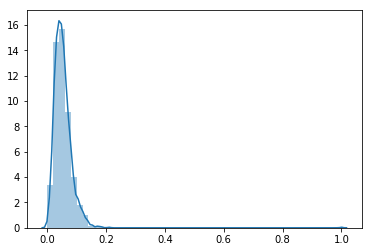

In [71]:
sns.distplot(anomalyScoresTF55)

In [460]:
Xrs=ss.inverse_transform(X)

#reformat data to plottable 3-d array
test11_ = digits.data.reshape(digits.data.shape[0],int(digits.data.shape[1]**(.5)),int(digits.data.shape[1]**(.5)))

test11 = X.reshape(X.shape[0],int(X.shape[1]**(.5)),int(X.shape[1]**(.5)))


test11rs = Xrs.reshape(Xrs.shape[0],int(Xrs.shape[1]**(.5)),int(Xrs.shape[1]**(.5)))


test11.shape

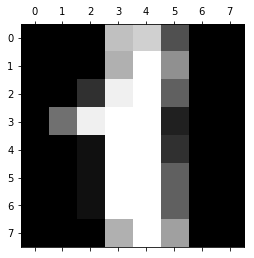

In [485]:
import matplotlib.pyplot as plt 
import numpy as np 
plt.gray() 
plt.matshow(test11rs[1])
plt.show()

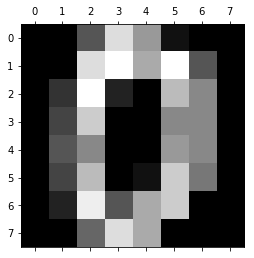

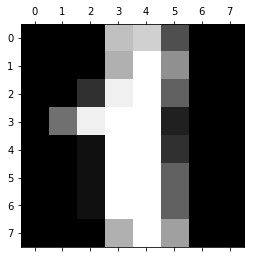

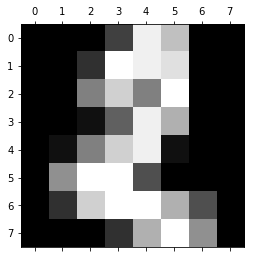

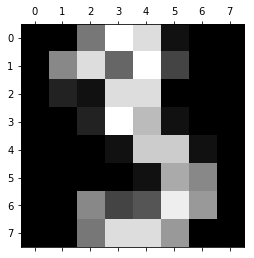

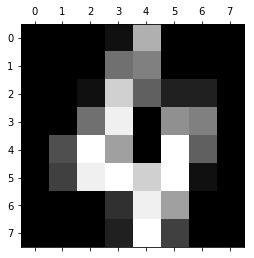

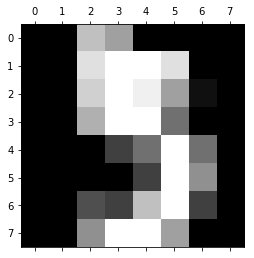

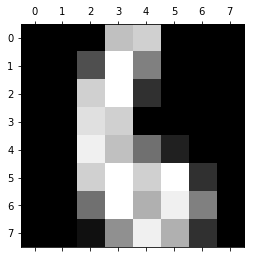

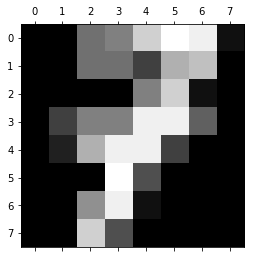

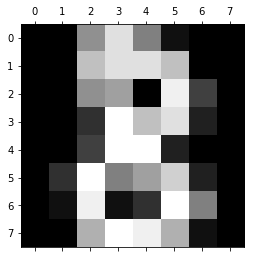

In [484]:
import matplotlib.pyplot as plt 
plt.gray() 
for i in range(0,9):
    plt.matshow(digits.images[i]) 
plt.show() 

In [3]:
file = 'https://github.com/aapatel09/handson-unsupervised-learning/blob/master/datasets/credit_card_data/credit_card.csv?raw=true'

In [678]:
from sklearn.datasets import load_wine

In [680]:
data = load_wine()

In [682]:
print(data['DESCR'])

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 